In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np

import requests
from bs4 import BeautifulSoup
import re
import time
import os

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False


In [2]:
pitcher = pd.read_csv('data10/picher_stats_2017.csv')
batter = pd.read_csv('data10/batter_stats_2017.csv')

In [3]:
pitcher.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

In [4]:
pitcher.isna().sum()


선수명         0
팀명          0
승           0
패           0
세           0
홀드          0
블론          0
경기          0
선발          0
이닝          0
삼진/9        0
볼넷/9        0
홈런/9        0
BABIP       0
LOB%        0
ERA         0
RA9-WAR     0
FIP         0
kFIP        0
WAR         0
연봉(2018)    0
연봉(2017)    0
dtype: int64

In [5]:
batter.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       191 non-null    object 
 1   팀명        191 non-null    object 
 2   경기        191 non-null    int64  
 3   타석        191 non-null    int64  
 4   타수        191 non-null    int64  
 5   안타        191 non-null    int64  
 6   홈런        191 non-null    int64  
 7   득점        191 non-null    int64  
 8   타점        191 non-null    int64  
 9   볼넷        191 non-null    int64  
 10  삼진        191 non-null    int64  
 11  도루        191 non-null    int64  
 12  BABIP     191 non-null    object 
 13  타율        191 non-null    float64
 14  출루율       191 non-null    float64
 15  장타율       191 non-null    float64
 16  OPS       191 non-null    float64
 17  wOBA      191 non-null    float64
 18  WAR       191 non-null    float64
 19  연봉(2018)  191 non-null    int64  
 20  연봉(2017)  191 non-null    int64 

In [6]:
batter.isna().sum()


선수명         0
팀명          0
경기          0
타석          0
타수          0
안타          0
홈런          0
득점          0
타점          0
볼넷          0
삼진          0
도루          0
BABIP       0
타율          0
출루율         0
장타율         0
OPS         0
wOBA        0
WAR         0
연봉(2018)    0
연봉(2017)    0
dtype: int64

## 연봉에 대한 정보

In [7]:
pitcher['연봉(2018)'].describe()


count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

In [8]:
pitcher['연봉(2018)']

0      140000
1      120000
2      230000
3      100000
4      111000
        ...  
147      7100
148      7500
149     10000
150      4000
151      4000
Name: 연봉(2018), Length: 152, dtype: int64

In [9]:
pitcher.sort_values(by='연봉(2018)', ascending=False)


,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
20,정우람,한화,6,4,26,0,5,56,0,59.0,...,0.76,0.304,79.4,2.75,2.85,3.26,2.69,1.81,120000,120000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,장지훈,삼성,0,0,0,0,0,4,0,2.1,...,0.00,0.500,100.0,0.00,0.09,0.73,-0.69,0.08,2800,2700
89,차재용,롯데,0,0,0,0,0,3,0,2.1,...,0.00,0.167,100.0,0.00,0.08,2.02,1.83,0.05,2800,2800
103,성영훈,두산,0,0,0,0,0,1,0,1.0,...,0.00,0.000,100.0,0.00,0.04,6.73,7.64,-0.01,2700,2700
115,정동윤,SK,0,0,0,0,0,2,0,3.0,...,3.00,0.364,71.4,9.00,-0.03,9.40,10.05,-0.07,2700,2700


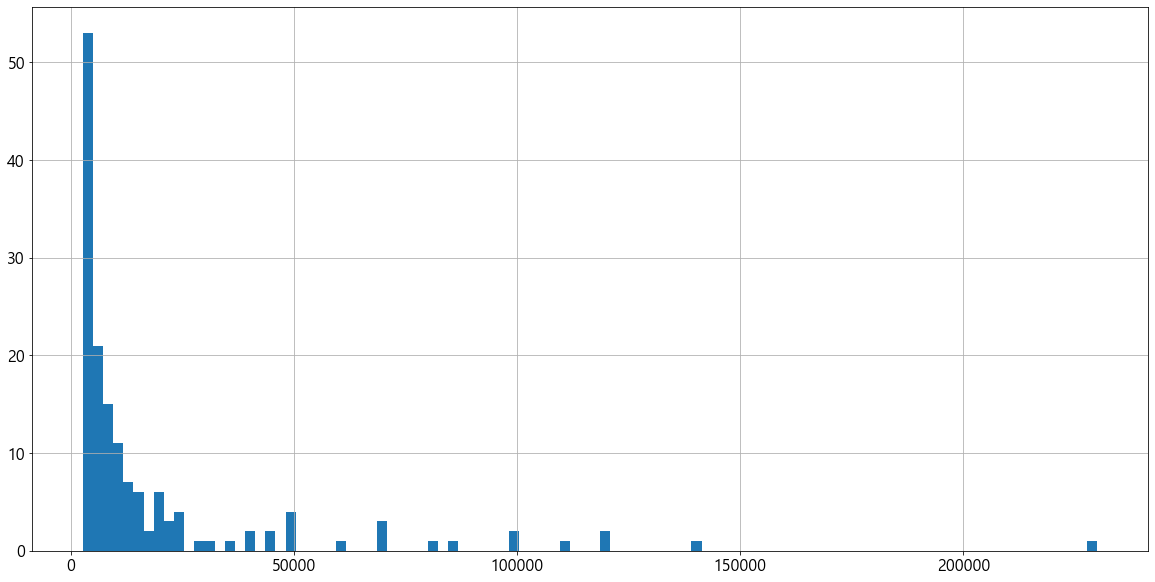

In [10]:
pitcher['연봉(2018)'].hist(bins=100)
plt.show()


In [11]:
pitcher['연봉(2018)'].value_counts()

4000      9
3000      9
6000      6
2900      5
4200      4
         ..
7300      1
16000     1
60000     1
5500      1
230000    1
Name: 연봉(2018), Length: 67, dtype: int64

In [12]:
batter['연봉(2018)'].describe()

count       191.000000
mean      20625.654450
std       31978.855209
min        2700.000000
25%        4200.000000
50%        7500.000000
75%       25000.000000
max      250000.000000
Name: 연봉(2018), dtype: float64

In [13]:
batter.sort_values(by='연봉(2018)', ascending=False)


,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
16,이대호,롯데,142,608,540,173,34,73,111,50,...,1,0.327,0.320,0.391,0.533,0.924,0.388,3.86,250000,250000
22,김태균,한화,94,407,356,121,17,51,76,43,...,0,0.362,0.340,0.413,0.545,0.958,0.401,2.96,160000,160000
1,최형우,KIA,142,629,514,176,26,98,120,96,...,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
4,손아섭,롯데,144,667,576,193,20,113,80,83,...,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000
10,러프,삼성,134,591,515,162,31,90,124,60,...,2,0.344,0.315,0.396,0.569,0.965,0.402,4.59,140000,110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,이우성,두산,2,2,2,0,0,0,0,0,...,0,0,0.000,0.000,0.000,0.000,0.000,-0.07,2800,2800
104,박유연,두산,3,3,3,1,0,0,0,0,...,0,1,0.333,0.333,0.333,0.666,0.299,0.00,2800,2700
147,신진호,NC,9,12,12,1,0,1,0,0,...,0,0.143,0.083,0.083,0.167,0.250,0.103,-0.23,2800,2700
133,박성한,SK,2,4,4,0,0,0,0,0,...,0,0,0.000,0.000,0.000,0.000,0.000,-0.13,2700,2700


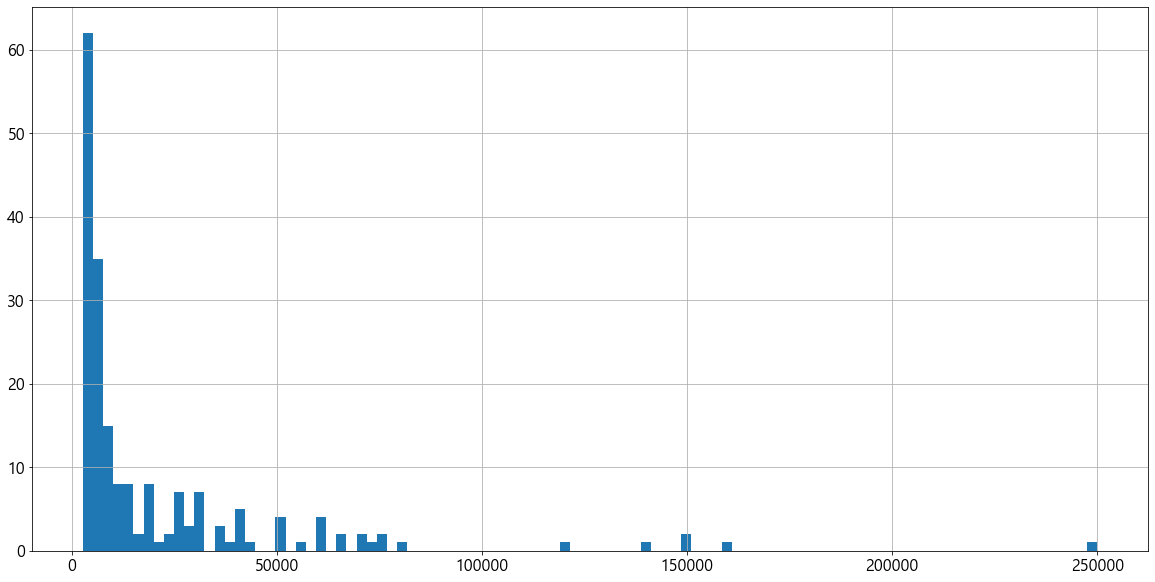

In [14]:
batter['연봉(2018)'].hist(bins=100)
plt.show()

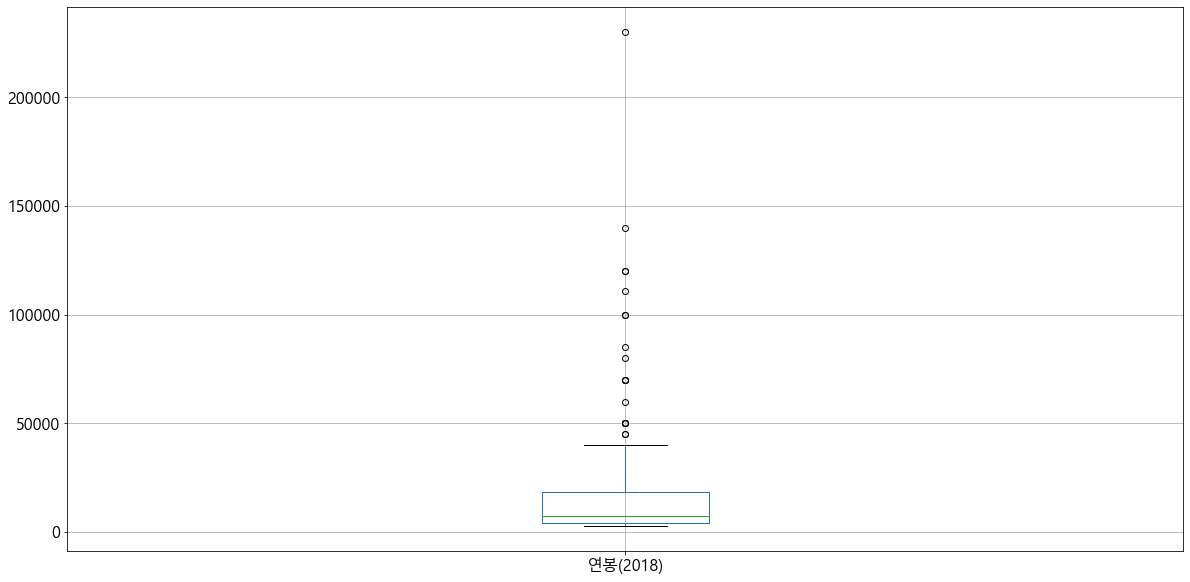

In [15]:
pitcher.boxplot(column=['연봉(2018)'])
plt.show()

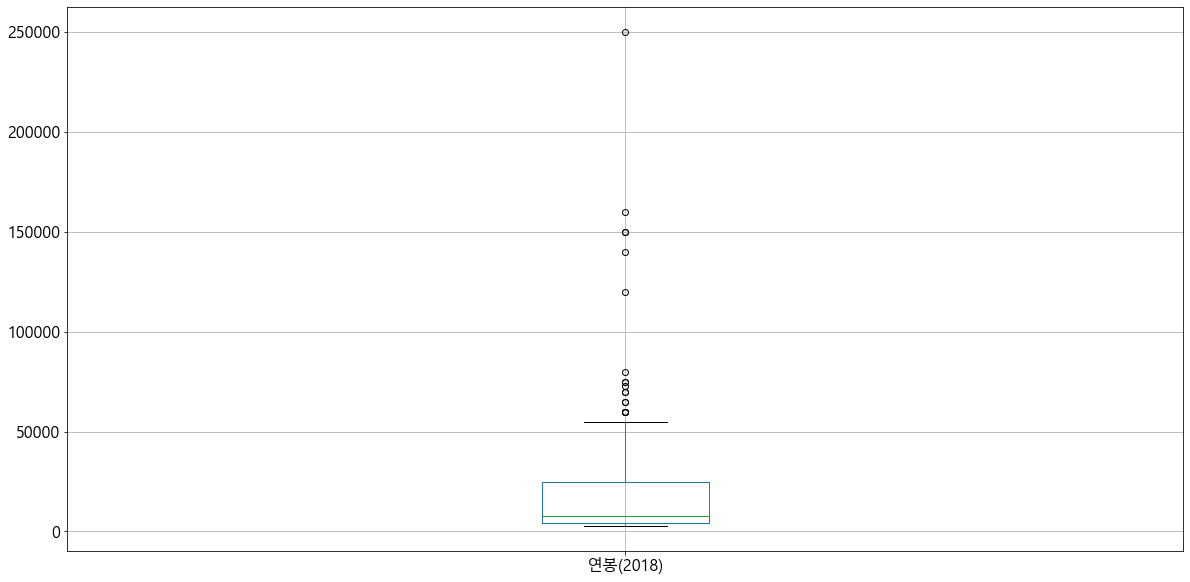

In [16]:
batter.boxplot(column=['연봉(2018)'])
plt.show()

## 회귀 분석에서 사용할 피처 살펴보기

In [17]:
#컬럼 종류 파악
pitcher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [18]:
# 선수명과 팀명을 날려준다.
pitcher2 = pitcher.drop(['선수명', '팀명'], axis=1)
pitcher2.columns

Index(['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')

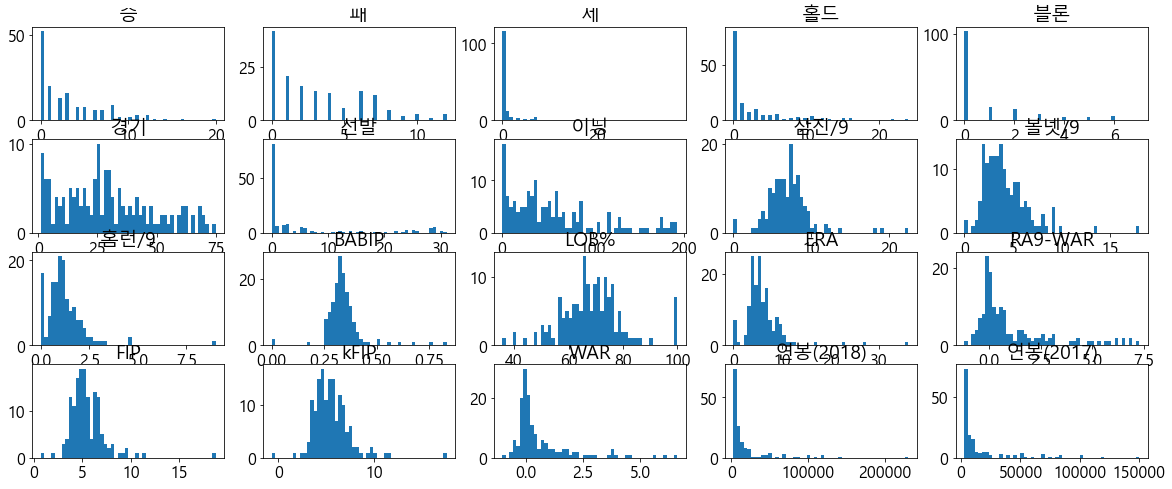

In [19]:
fig = plt.figure(1)

# 컬럼의 수 만큼 반복한다.
for i in range(len(pitcher2.columns)) :
    # 서브플롯 생성
    ax = fig.add_subplot(5, 5, i + 1)
    # 히스토그램을 그린다.
    plt.hist(pitcher2[pitcher2.columns[i]], bins=50)
    # 타이틀
    ax.set_title(pitcher2.columns[i])

plt.show()


## 투수연봉 예측하기

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
# 선수명과 팀명을 날려준다.
pitcher_df = pitcher.drop(['선수명', '팀명','연봉(2018)'], axis=1)
pitcher_df.columns

Index(['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)'],
      dtype='object')

In [22]:
# 표준화
scaler1 = StandardScaler()
scaler1.fit(pitcher_df)
pitcher_df = scaler1.transform(pitcher_df)
pitcher_df

array([[ 3.32457765,  1.23120199, -0.30746498, ..., -1.06162315,
         4.51802888,  2.74374569],
       [ 2.02618144,  2.51300132, -0.09882803, ..., -1.07681252,
         4.10827019,  1.34172411],
       [ 4.36329461,  0.91075216, -0.30746498, ..., -0.86922457,
         3.77439273,  5.34750005],
       ...,
       [-0.8302902 , -0.37104718, -0.30746498, ...,  1.39399038,
        -0.9681847 , -0.02023971],
       [-0.8302902 , -0.05059734, -0.30746498, ...,  0.71553221,
        -1.03647782, -0.54499636],
       [ 0.20842676,  0.26985249, -0.30746498, ...,  1.15096059,
        -1.27170966, -0.54099058]])

## 투수 연봉 예측하기

In [23]:
pitcher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [24]:
# 불필요한 컬럼을 제거
pitcher_df = pitcher.drop('선수명', axis=1)
pitcher_df.columns

Index(['팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [25]:
# 입력과 결과로 나눈다.
X = pitcher_df.drop('연봉(2018)', axis=1)
y = pitcher_df['연봉(2018)']

display(X)
display(y)


,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,SK,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000
1,LG,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000
2,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000
3,LG,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000
4,롯데,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,한화,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,8100
148,KIA,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,3100
149,롯데,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,16000
150,삼성,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,2900


0      140000
1      120000
2      230000
3      100000
4      111000
        ...  
147      7100
148      7500
149     10000
150      4000
151      4000
Name: 연봉(2018), Length: 152, dtype: int64

In [26]:
# 팀명을 숫자로 변환한다.
from sklearn.preprocessing import LabelEncoder

encoder1 = LabelEncoder()
encoder1.fit(X['팀명'])
X['팀명'] = encoder1.transform(X['팀명'])
X['팀명'].value_counts()


8    20
7    20
1    19
4    18
2    18
5    15
0    15
6    14
3    13
Name: 팀명, dtype: int64

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   팀명        152 non-null    int32  
 1   승         152 non-null    int64  
 2   패         152 non-null    int64  
 3   세         152 non-null    int64  
 4   홀드        152 non-null    int64  
 5   블론        152 non-null    int64  
 6   경기        152 non-null    int64  
 7   선발        152 non-null    int64  
 8   이닝        152 non-null    float64
 9   삼진/9      152 non-null    float64
 10  볼넷/9      152 non-null    float64
 11  홈런/9      152 non-null    float64
 12  BABIP     152 non-null    float64
 13  LOB%      152 non-null    float64
 14  ERA       152 non-null    float64
 15  RA9-WAR   152 non-null    float64
 16  FIP       152 non-null    float64
 17  kFIP      152 non-null    float64
 18  WAR       152 non-null    float64
 19  연봉(2017)  152 non-null    int64  
dtypes: float64(11), int32(1), int64(

In [28]:
# 표준화작업
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)
X

array([[-0.04225053,  3.32457765,  1.23120199, ..., -1.06162315,
         4.51802888,  2.74374569],
       [-0.7977895 ,  2.02618144,  2.51300132, ..., -1.07681252,
         4.10827019,  1.34172411],
       [-1.55332846,  4.36329461,  0.91075216, ..., -0.86922457,
         3.77439273,  5.34750005],
       ...,
       [ 0.71328843, -0.8302902 , -0.37104718, ...,  1.39399038,
        -0.9681847 , -0.02023971],
       [ 1.09105791, -0.8302902 , -0.05059734, ...,  0.71553221,
        -1.03647782, -0.54499636],
       [-1.17555898,  0.20842676,  0.26985249, ...,  1.15096059,
        -1.27170966, -0.54099058]])

In [29]:
from sklearn.model_selection import train_test_split

# 학습용과 검증용으로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

X= X_train
y= y_train

In [30]:
# 교차 검증
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression


# 폴드 생성
kfold = KFold(n_splits=20, shuffle=True, random_state=1)

# 하이퍼 파라미터 튜닝
params = {
    # 트리의 개수
    'n_estimators' : [10, 50, 100, 150, 200],
    # 질문 깊이
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}


# 모델 생성
model = XGBRegressor(silent=True, verbosity=0, tree_method='gpu_hist')


# 하이퍼 파라미터 튜닝
grid =GridSearchCV(model, param_grid=params, scoring='r2', cv=kfold)
grid.fit(X,y)

print(f'최적의 하이퍼 파라미터 : {grid.best_params_}')
print(f'최적의 모델 평균 성능 : {grid.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 3, 'n_estimators': 50}
최적의 모델 평균 성능 : 0.7957617447460956


In [31]:
# 최적의 하이퍼파라미터가 셋팅된 모델을 추출한다.
best_model = grid.best_estimator_
best_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=12, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, silent=True, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=0)

In [32]:
# 교차 검증
result = cross_val_score(best_model, X,y, scoring='r2', cv=kfold)
result

array([0.73465096, 0.29083687, 0.79714555, 0.69725321, 0.94459628,
       0.34077251, 0.94590439, 0.89894845, 0.53525067, 0.80271444,
       0.71843803, 0.99058046, 0.99438485, 0.89935382, 0.98925247,
       0.94714384, 0.96173023, 0.94783728, 0.60635284, 0.87208775])

In [33]:
# 데이터를 학습 시킨다.
best_model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=12, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, silent=True, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=0)

In [34]:
# 결과를 예측한다.
y_pred = best_model.predict(X_test)
y_pred

array([11502.347 , 22860.004 ,  3490.6382,  8750.755 ,  9241.13  ,
        2597.2485,  2527.8254, 16904.111 ,  4839.591 , 52743.992 ,
        8743.616 ,  6604.3486,  3356.3438,  4033.4963, 30539.598 ,
        5792.839 , 20989.81  ,  3536.1426,  2763.7427,  2602.716 ,
        3999.7563,  6702.2476,  3168.467 ,  3828.9055,  1953.6078,
       17553.668 , 13423.04  , 14887.544 ,  6977.5605,  4607.5986,
       10634.932 ], dtype=float32)

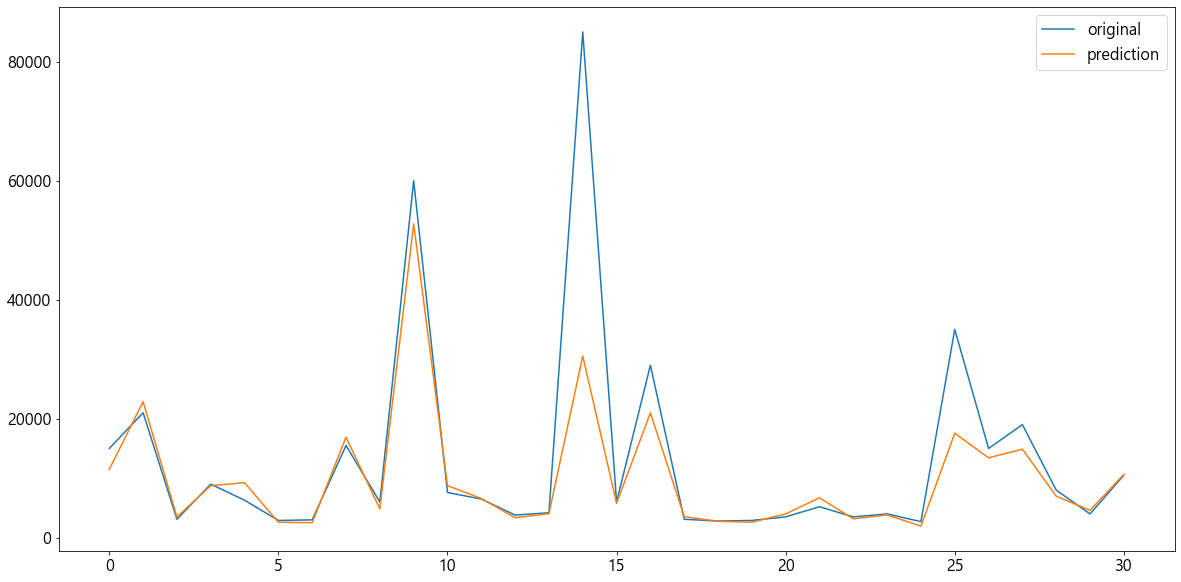

In [37]:
# 진짜 결과와 예측 결과를 그래프로 확인한다.
plt.plot(y_test.values, label='original')
plt.plot(y_pred, label='prediction')
plt.legend()
plt.show()